In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Analyst/Walmart.csv")

In [3]:
df

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,6898,852,Headphones,Appliances,1,682.15,7/8/2024 6:13,17,"New York, NY",...,Gold,Cash,False,NaN,Sunny,False,Wednesday,True,257,294
4996,4997,8412,886,Laptop,Appliances,3,1418.09,2/7/2024 11:30,16,"Los Angeles, CA",...,Bronze,Digital Wallet,True,NaN,Sunny,True,Sunday,True,388,397
4997,4998,8331,934,Fridge,Electronics,5,398.66,8/20/2024 0:38,16,"New York, NY",...,Bronze,Digital Wallet,True,NaN,Cloudy,False,Thursday,True,314,204
4998,4999,7505,439,Laptop,Appliances,3,1000.95,8/26/2024 11:05,16,"Miami, FL",...,Silver,Debit Card,True,NaN,Stormy,False,Tuesday,False,488,144


In [4]:
# Check info
# Complete details of the dataset (Include:- Column_name, No of records, datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   int64  
 6   unit_price              5000 non-null   float64
 7   transaction_date        5000 non-null   object 
 8   store_id                5000 non-null   int64  
 9   store_location          5000 non-null   object 
 10  inventory_level         5000 non-null   int64  
 11  reorder_point           5000 non-null   int64  
 12  reorder_quantity        5000 non-null   int64  
 13  supplier_id             5000 non-null   int64  
 14  supplier_lead_time      5000 non-null   

In [5]:
# To check the null values
print(df.isnull().sum())

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64


In [6]:
3407+1593

5000

In [7]:
# Checking unique values
df['promotion_type'].unique()


array([nan, 'Percentage Discount', 'BOGO'], dtype=object)

In [8]:
#Filing Null Values
df['promotion_type']=df['promotion_type'].fillna('None')

In [9]:
df.isnull().sum()

,0
transaction_id,0
customer_id,0
product_id,0
product_name,0
category,0
quantity_sold,0
unit_price,0
transaction_date,0
store_id,0
store_location,0


In [10]:
# Statistical Summary of the Numerical Columns
df.describe()

,transaction_id,customer_id,product_id,quantity_sold,unit_price,store_id,inventory_level,reorder_point,reorder_quantity,supplier_id,supplier_lead_time,customer_age,customer_income,forecasted_demand,actual_demand
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,5542.497200,551.233400,2.982800,1023.467294,10.525000,253.121800,99.788000,200.517000,300.12560,5.523000,44.124000,70041.627846,297.134000,299.08840
std,1443.520003,2582.126997,258.826606,1.419474,559.614242,5.786888,142.885456,29.132387,58.257381,116.39486,2.863549,15.329358,29053.371736,115.568806,121.68078
min,1.000000,1001.000000,100.000000,1.000000,50.100000,1.000000,0.000000,50.000000,100.000000,100.00000,1.000000,18.000000,20005.340000,100.000000,90.00000
25%,1250.750000,3279.000000,322.000000,2.000000,537.775000,5.000000,130.000000,75.000000,150.750000,199.00000,3.000000,31.000000,44865.417500,195.000000,194.00000
50%,2500.500000,5558.000000,559.000000,3.000000,1029.175000,11.000000,253.000000,100.000000,200.500000,299.00000,6.000000,44.000000,70188.290000,297.500000,299.00000
75%,3750.250000,7767.250000,776.000000,4.000000,1506.307500,16.000000,377.250000,125.000000,251.000000,405.00000,8.000000,58.000000,95395.872500,395.000000,404.00000
max,5000.000000,9998.000000,999.000000,5.000000,1999.850000,20.000000,500.000000,150.000000,300.000000,500.00000,10.000000,70.000000,119999.780000,500.000000,510.00000


**EXPLORATORY DATA ANALYSIS(EDA)**





**Q1: What is the total sales valoume across all walmart stores?**


**How it Helps:** Provides a brid's-eye-view of walmart's overall product sales volume.

**Bussines Impact:** Helps in determining high-level sales perfomance and overall inventory demand.

In [11]:
# total_sales_volume
df['quantity_sold'].sum()
print("Total Number of Quantity Sold:-", df['quantity_sold'].sum()
)


Total Number of Quantity Sold:- 14914


**Q2: What is the average unit price of all products sold?**

**How it Helps:** Identifies Product Pricing Trends Across Different Categories.

**Business Impact:** Assists in Price Optimization For Differnt Product Line to Maximize Profit Margins.  

In [12]:
average_price = df.groupby('product_name')['unit_price'].mean()
average_price

,unit_price
product_name,
Camera,1015.638312
Fridge,993.185954
Headphones,1022.561726
Laptop,1018.981159
Smartphone,1038.293276
TV,1052.523066
Tablet,996.608253
Washing Machine,1052.249837


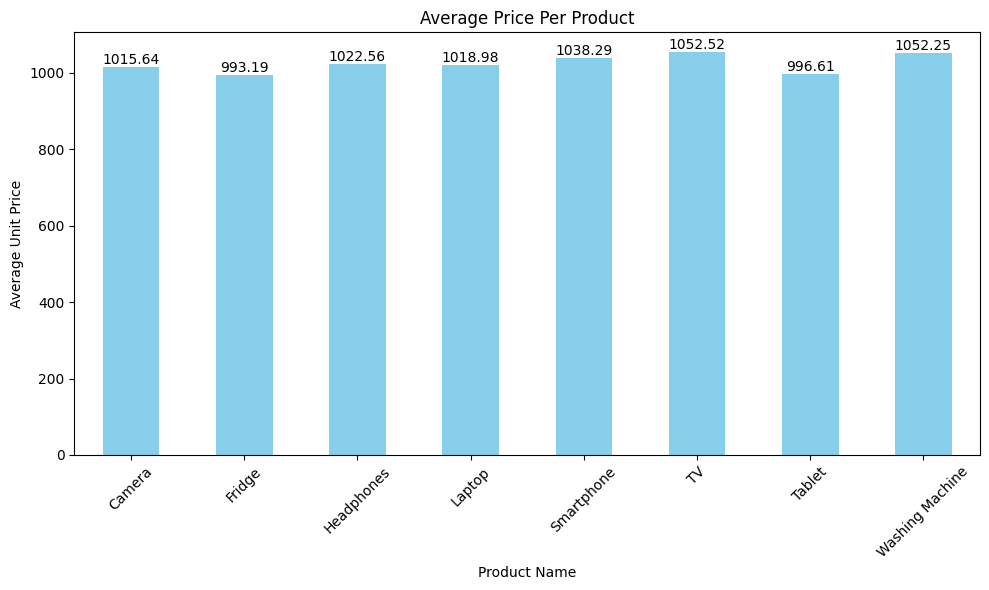

In [13]:
import matplotlib.pyplot as plt

# Calculate average price
average_price = df.groupby('product_name')['unit_price'].mean()

# Plot bar graph
plt.figure(figsize=(10,6))
bars = average_price.plot(kind='bar', color='skyblue')
plt.title('Average Price Per Product')
plt.xlabel('Product Name')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45, ha='center')

# Add data labels
for index, value in enumerate(average_price):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Q3: Which stores are underperforming in terms of sales volume?**

**How it Helps:** Identifies stores that may need additional inventory support or different market strategies.

**Bussines Impact:** Allows the opertions team to allocate inventory more strategically and support underperforming locations.

In [14]:
sales_by_store = df.groupby('store_id')['quantity_sold'].sum().sort_values()
sales_by_store

,quantity_sold
store_id,
6,658
4,685
7,713
14,713
12,714
18,730
3,732
16,738
17,740


In [15]:
sales_by_store.median()

749.0

In [16]:
# Define underperforming stores as those below a threshold (e.g., below the median)
threshold = sales_by_store.median()
underperforming_stores = sales_by_store[sales_by_store < threshold]

# Display underperforming stores
print('Underperforming Stores:')
print(underperforming_stores)


Underperforming Stores:
store_id
6     658
4     685
7     713
14    713
12    714
18    730
3     732
16    738
17    740
Name: quantity_sold, dtype: int64


**Q4: What count of transcations involved promotions?**

**How it Helps:** Helps assess the reach and usage of promotional compaigns.

**Bussines Impact:** Provides insights into whether promotions are driving enough sales to justfiy their costs.

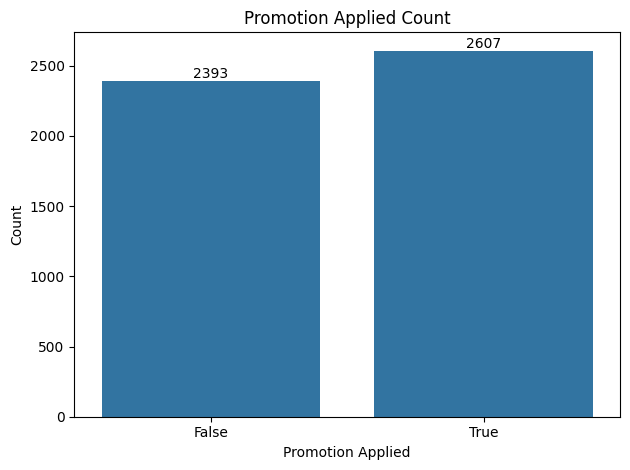

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
ax = sns.countplot(x='promotion_applied', data=df)

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Promotion Applied Count')
plt.xlabel('Promotion Applied')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Q5: What is the total revenue generated from sales promotions events?**

**How it Helps:** Understand product demand variation during holidays.

**Bussines Impact:** Enable better inventory planning for peak holidays seasons.

In [18]:
df

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,None,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,None,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,None,Sunny,False,Thursday,True,287,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,6898,852,Headphones,Appliances,1,682.15,7/8/2024 6:13,17,"New York, NY",...,Gold,Cash,False,None,Sunny,False,Wednesday,True,257,294
4996,4997,8412,886,Laptop,Appliances,3,1418.09,2/7/2024 11:30,16,"Los Angeles, CA",...,Bronze,Digital Wallet,True,None,Sunny,True,Sunday,True,388,397
4997,4998,8331,934,Fridge,Electronics,5,398.66,8/20/2024 0:38,16,"New York, NY",...,Bronze,Digital Wallet,True,None,Cloudy,False,Thursday,True,314,204
4998,4999,7505,439,Laptop,Appliances,3,1000.95,8/26/2024 11:05,16,"Miami, FL",...,Silver,Debit Card,True,None,Stormy,False,Tuesday,False,488,144


In [19]:
df['revenue']= df['quantity_sold']*df['unit_price']

In [20]:
# calculate total revenue during promotional events
promo_revenue= df[df['promotion_applied']== True]['revenue'].sum()
promo_revenue

np.float64(8062411.030000001)

***Q6: Which product categories see the largest increase in demand during holidays? ***

**How it Helps:** Understands product demand vartions during holidays.

**Bussines Impact:** Enables better inventory planning for peak holiday seasons.

product_name
Camera              934
Fridge              948
Headphones          881
Laptop              871
Smartphone         1018
TV                  926
Tablet             1005
Washing Machine     873
Name: quantity_sold, dtype: int64


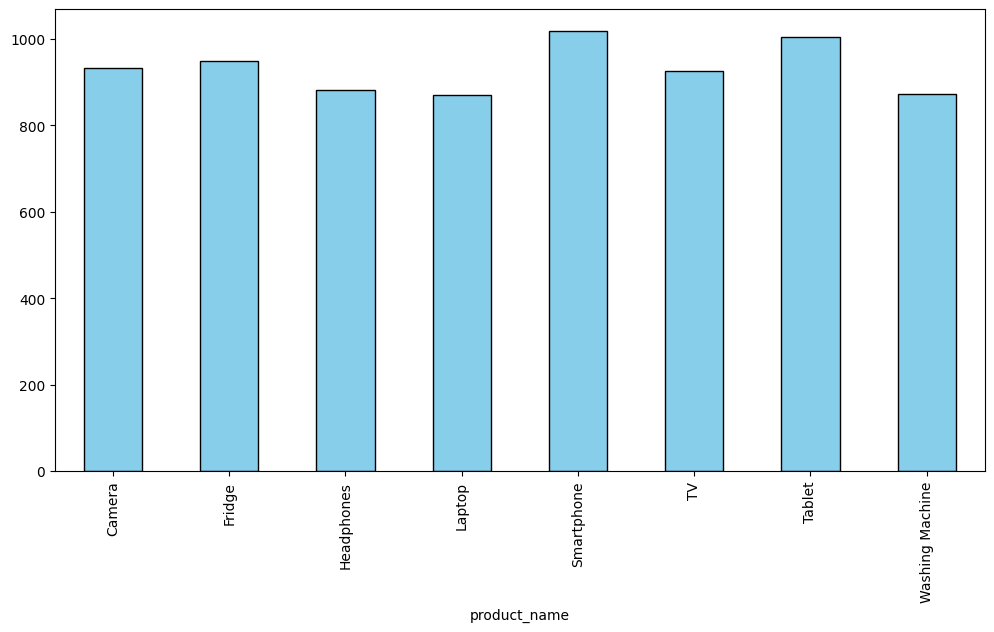

In [21]:
#Filter data for holidays
holiday_sales = df[df['holiday_indicator']== True]

#Group by product_name and calculate total quantity sold
holiday_demand = holiday_sales.groupby('product_name')['quantity_sold'].sum()

#Display results
print(holiday_demand)

#Plot the bar graph
plt.figure(figsize=(12,6))
ax=holiday_demand.plot(kind='bar', color='skyblue', edgecolor= 'black')

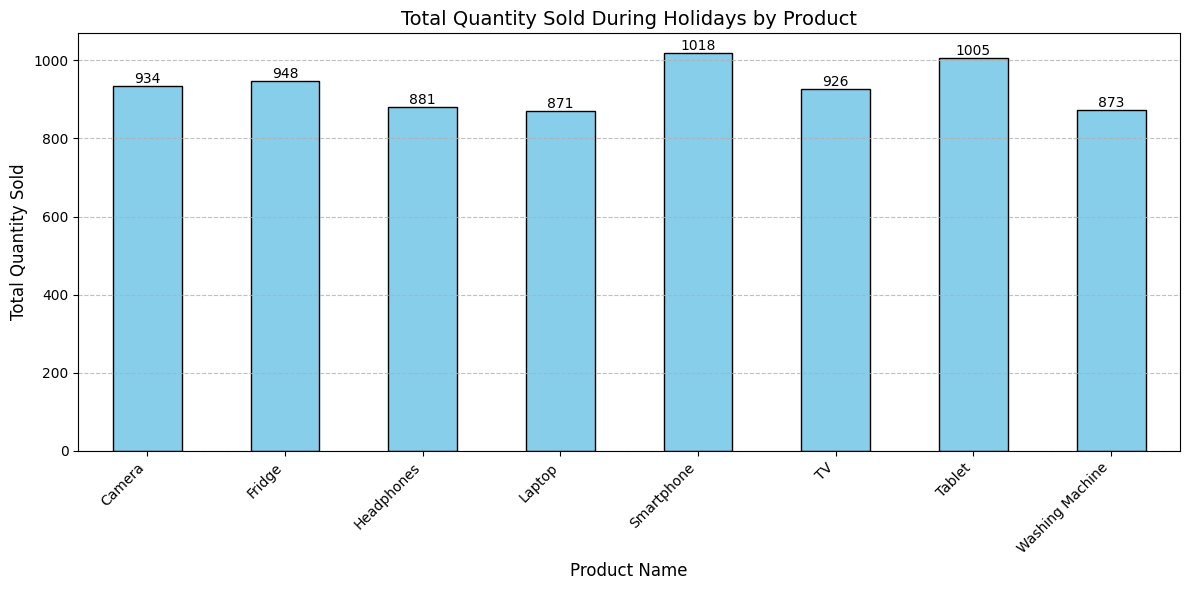

In [22]:
# Plot the bar graph
plt.figure(figsize=(12,6))
ax=holiday_demand.plot(kind='bar', color='skyblue', edgecolor= 'black')

# Add data labels
for index, value in enumerate(holiday_demand):
  plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Total Quantity Sold During Holidays by Product', fontsize=14)
plt.xlabel('Product Name', fontsize= 12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()

# Show the plot
plt.show()




**Q7: What is the correlation between weather conditions and sales performance?**

**How it Helps:** Reveals how external factors, like weather, infulance customer purchasing behavior.

**Bussine Impact:** Assists in demand forecasting based on weather trends, leading to better inventory preparation.

In [23]:
a= df.groupby('weather_conditions')['revenue'].sum()
a

,revenue
weather_conditions,
Cloudy,3878416.82
Rainy,3562222.42
Stormy,3843358.52
Sunny,3979603.69


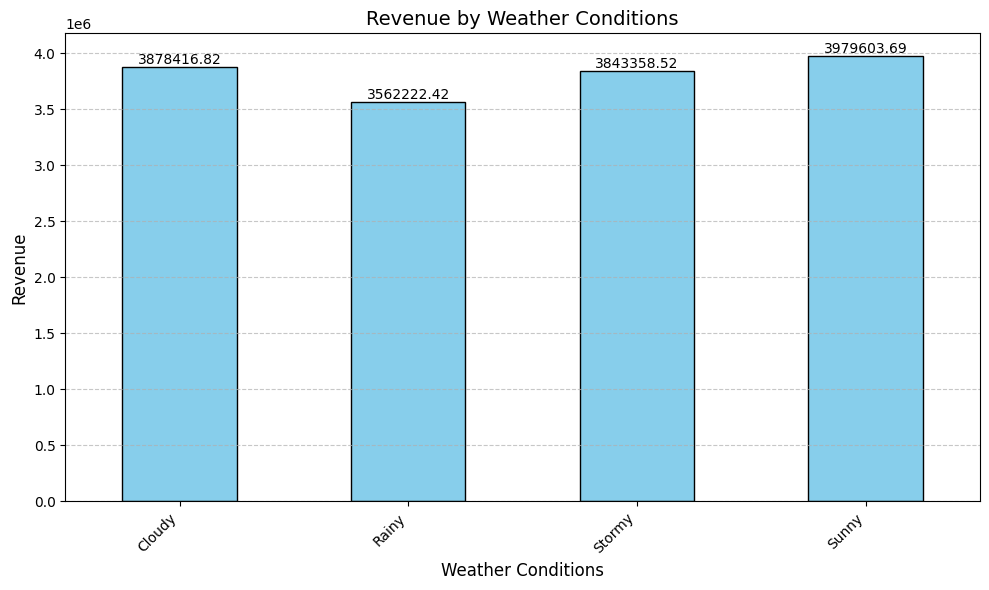

In [24]:
# Plot the bar graph
plt.figure(figsize=(10,6))
ax=a.plot(kind='bar', color='skyblue', edgecolor= 'black')

# Add data labels
for index, value in enumerate(a):
  plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Revenue by Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions', fontsize= 12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()



***Q8: How dose customer loyalty level affect purchasing patterns? ***

**How it Helps:** Helps understand how loyalty programs impact repeat purchases.

**Bussines Impact:** Insights can be used to enhance customer retention strategies.

In [25]:
loyalty_analysis = df.groupby('customer_loyalty_level').agg({
    'revenue': ['sum', 'mean'],               # Total and average revenue
    'customer_id': pd.Series.nunique,         # Unique customers by loyalty level
    'transaction_id': 'count'                 # Total number of orders
})

print(loyalty_analysis)


                           revenue              customer_id transaction_id
                               sum         mean     nunique          count
customer_loyalty_level                                                    
Bronze                  3795198.45  3028.889425        1161           1253
Gold                    3536863.54  3049.020293        1077           1160
Platinum                4012963.14  3089.271085        1213           1299
Silver                  3918576.32  3042.372919        1211           1288


In [26]:
# Perform groupby and aggregation
loyalty_analysis = df.groupby('customer_loyalty_level').agg({
    'revenue': ['sum', 'mean'],               # Total and average revenue
    'customer_id': pd.Series.nunique,         # Unique customers by loyalty level
    'transaction_id': 'count'                 # Total number of orders
}).reset_index()

# Sort the dataframe by 'Revenue' (sum) in ascending order
loyalty_analysis_sorted = loyalty_analysis.sort_values(by=('revenue', 'sum'), ascending= False)

# Display sorted dataframe
print(loyalty_analysis_sorted)


  customer_loyalty_level     revenue              customer_id transaction_id
                                 sum         mean     nunique          count
2               Platinum  4012963.14  3089.271085        1213           1299
3                 Silver  3918576.32  3042.372919        1211           1288
0                 Bronze  3795198.45  3028.889425        1161           1253
1                   Gold  3536863.54  3049.020293        1077           1160


**Q9: Calculate the monthly sales and find out the trends**

**How it Helps:** Tracks sales trends over time, identifying peak and off peak months for business performance.

**Business Impact:** Facilitates forecasting, inventory management,and promotional planning to maximize revenue during high-demand periods and optimize resources during low-demand months.

In [27]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [28]:
df['Month']= df['transaction_date'].dt.month_name()

In [29]:
df['Month_Number']= df['transaction_date'].dt.month

In [30]:
df['Month'].unique()

array(['March', 'July', 'June', 'August', 'September', 'April', 'May',
       'February', 'January'], dtype=object)

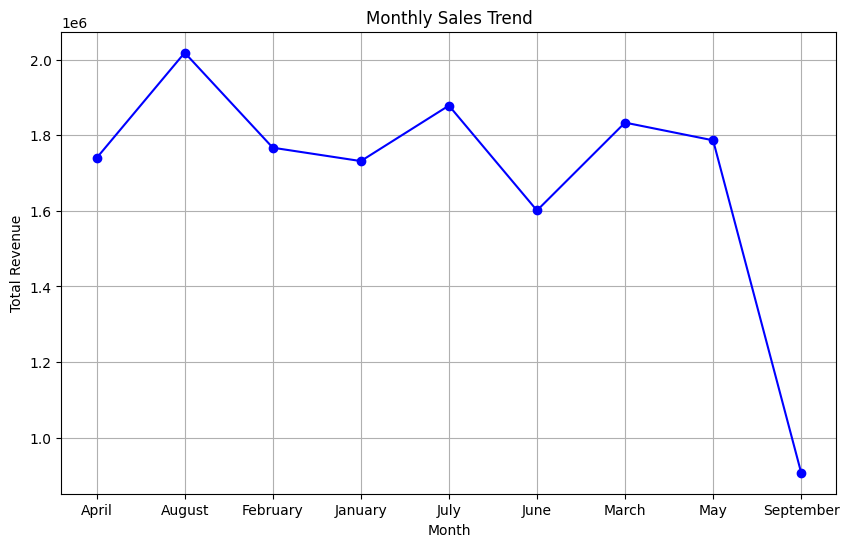

In [31]:
from os import P_ALL
# Step 2: Group by month calculate total revenue
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Step 3: Plot the trend line
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['Month'], monthly_revenue['revenue'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [32]:
Monthly_sales_walmart = df.groupby('Month_Number')['revenue'].sum().sort_values()
Monthly_sales_walmart

,revenue
Month_Number,
9,907268.07
6,1600978.97
1,1731651.65
4,1739800.75
2,1767062.38
5,1786559.47
3,1833450.84
7,1878513.51
8,2018315.81


**Q10: Which product has the best performance in terms of volume sold?**

**How it Helps:** Identifies top performing products, revealing customer preferences and high-demand items.

**Business Impact:** Supports target marketing efforts, inventory priorization, and strageic product placement to capitalize on best-sellers and imporve overall profitability

In [33]:
best_product= df.groupby('product_name')['quantity_sold'].sum()
best_product

,quantity_sold
product_name,
Camera,1873
Fridge,1967
Headphones,1816
Laptop,1685
Smartphone,1876
TV,1926
Tablet,1964
Washing Machine,1807


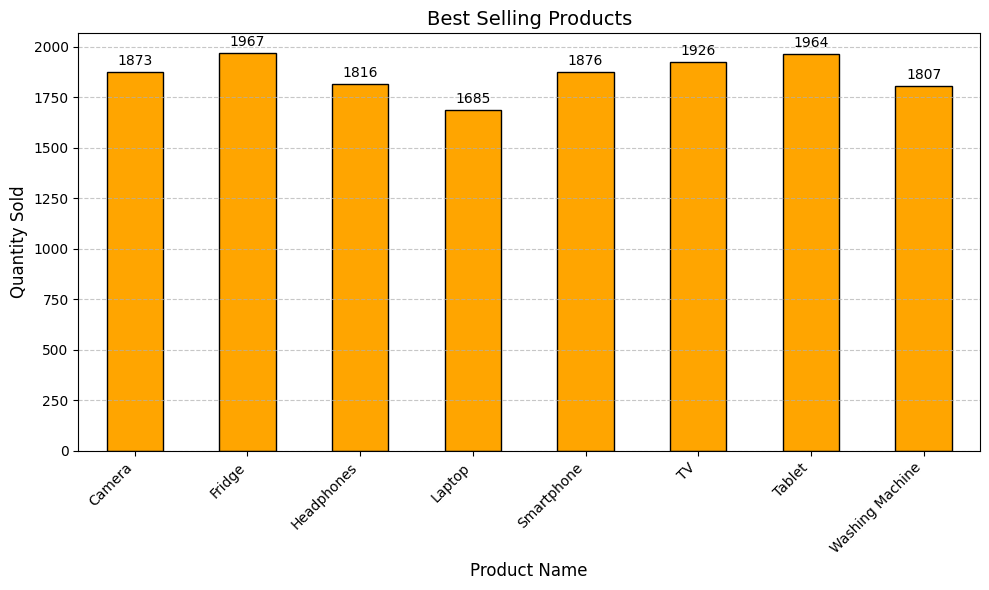

In [39]:
import matplotlib.pyplot as plt

# Plot the bar graph
plt.figure(figsize=(10, 6))
best_product.plot(kind='bar', color='orange', edgecolor='black')

# Customize the plot
plt.title('Best Selling Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data labels
for index, value in enumerate(best_product):
    plt.text(
        index, value + 0.01 * max(best_product),  # Slightly above the bar
        f'{value:.0f}',  # Format the value
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Show the plot
plt.show()
